C:\Users\pullu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:31:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Model Performance (XGBoost):
✅ Accuracy: 0.7282
✅ Precision: 0.2500
✅ Recall: 0.0002
✅ F1 Score: 0.0004
✅ ROC-AUC Score: 0.5000

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     14566
           1       0.25      0.00      0.00      5434

    accuracy                           0.73     20000
   macro avg       0.49      0.50      0.42     20000
weighted avg       0.60      0.73      0.61     20000



<Figure size 1000x600 with 0 Axes>

C:\Users\pullu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


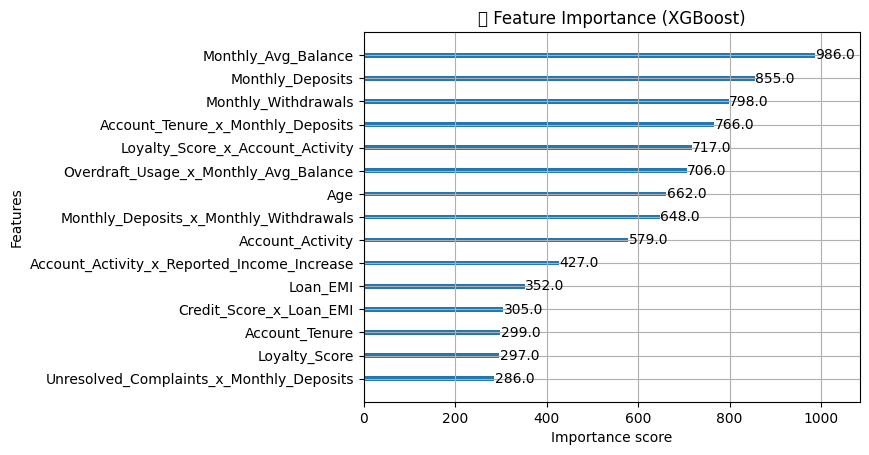

100%|===================| 19955/20000 [03:18<00:00]        

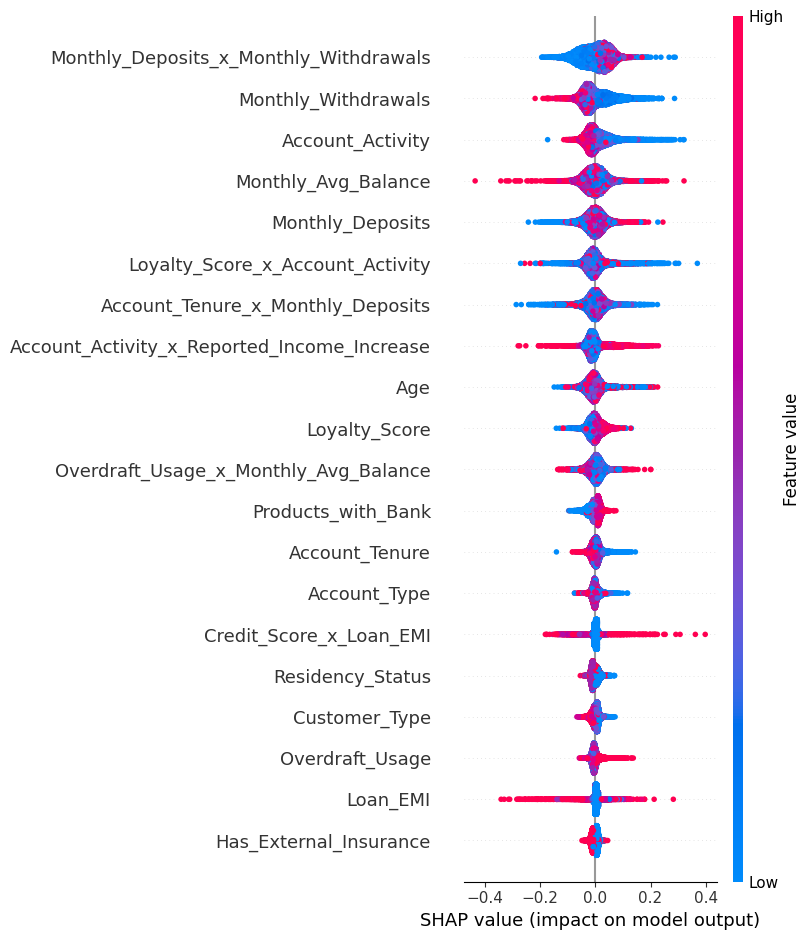

In [1]:
# 🚀 XGBoost Implementation for Customer Churn Prediction

import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 📌 Step 1: Load Processed Data
df = pd.read_csv("../data/features_with_interactions.csv")  # Updated dataset with interactions
y = pd.read_csv("../data/hidden_churn_labels.csv")["Churn"]  # Hidden churn labels

# 📌 Step 2: Identify Categorical & Numerical Features
categorical_features = ['Gender', 'Income_Group', 'Customer_Type', 'Residency_Status', 'Account_Type', 'Credit_Score']
numerical_features = [col for col in df.columns if col not in categorical_features and col != "Customer_ID"]

# 📌 Step 3: Encode Categorical Variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use

# 📌 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Customer_ID"]), y, test_size=0.2, random_state=42, stratify=y)

# 📌 Step 5: Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 📌 Step 6: Model Predictions & Performance Evaluation
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"📊 Model Performance (XGBoost):")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# 📌 Step 7: Feature Importance Plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=15)
plt.title("🔍 Feature Importance (XGBoost)")
plt.show()

# 📌 Step 8: SHAP Summary Plot
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


C:\Users\pullu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:08:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Model Performance (XGBoost):
✅ Accuracy: 0.7283
✅ Precision: 0.5000
✅ Recall: 0.0002
✅ F1 Score: 0.0004
✅ ROC-AUC Score: 0.5001

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     14566
           1       0.50      0.00      0.00      5434

    accuracy                           0.73     20000
   macro avg       0.61      0.50      0.42     20000
weighted avg       0.67      0.73      0.61     20000



<Figure size 1000x600 with 0 Axes>

C:\Users\pullu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


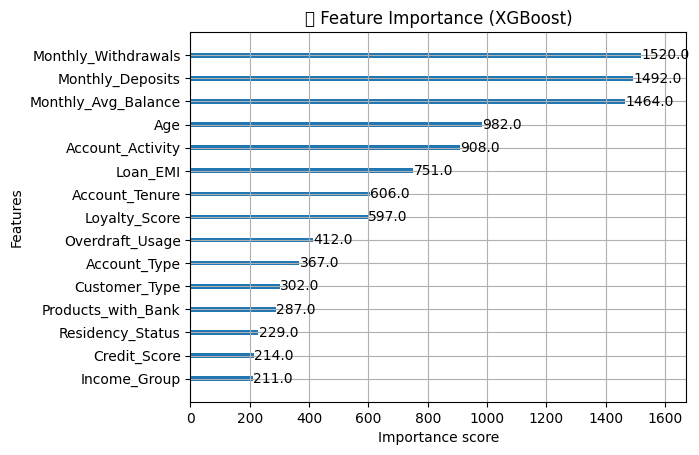

100%|===================| 19937/20000 [03:33<00:00]        

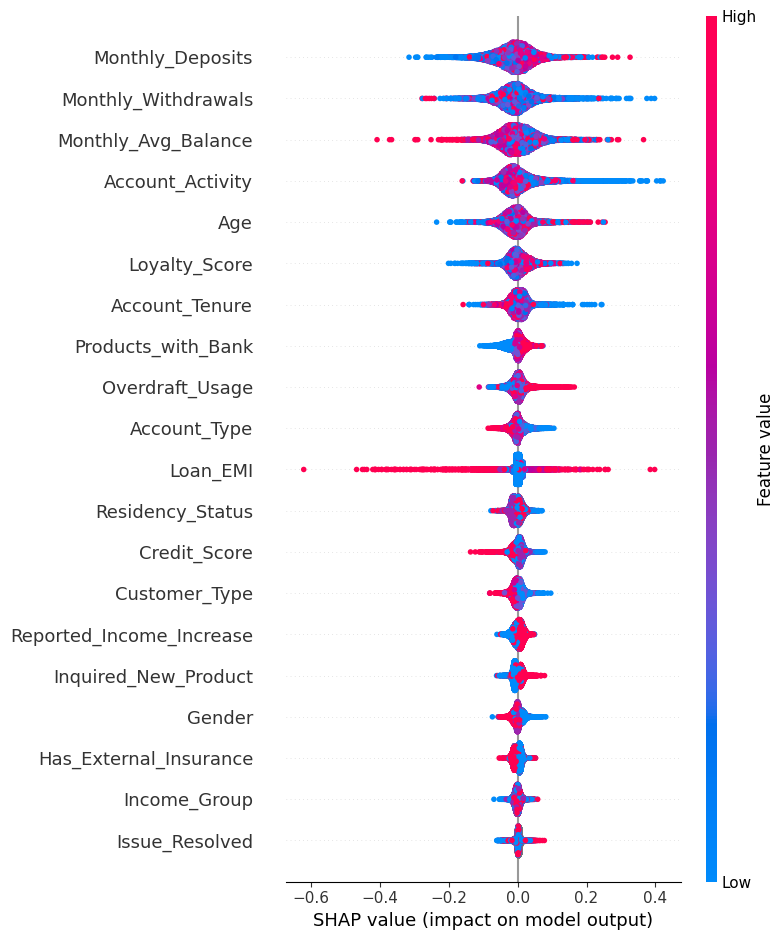

In [2]:
# 🚀 XGBoost Implementation for Customer Churn Prediction

import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 📌 Step 1: Load Processed Data
df = pd.read_csv("../data/features.csv")  # Updated dataset
y = pd.read_csv("../data/hidden_churn_labels.csv")["Churn"]  # Hidden churn labels

# 📌 Step 2: Identify Categorical & Numerical Features
categorical_features = ['Gender', 'Income_Group', 'Customer_Type', 'Residency_Status', 'Account_Type', 'Credit_Score']
numerical_features = [col for col in df.columns if col not in categorical_features and col != "Customer_ID"]

# 📌 Step 3: Encode Categorical Variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use

# 📌 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Customer_ID"]), y, test_size=0.2, random_state=42, stratify=y)

# 📌 Step 5: Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 📌 Step 6: Model Predictions & Performance Evaluation
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"📊 Model Performance (XGBoost):")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# 📌 Step 7: Feature Importance Plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=15)
plt.title("🔍 Feature Importance (XGBoost)")
plt.show()

# 📌 Step 8: SHAP Summary Plot
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [ ]:
#phase2 class imbalance handling

C:\Users\pullu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:12:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Model Performance (XGBoost + Class Imbalance Fix):
✅ Accuracy: 0.5471
✅ Precision: 0.2705
✅ Recall: 0.3931
✅ F1 Score: 0.3205
✅ ROC-AUC Score: 0.4988

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.60      0.66     14566
           1       0.27      0.39      0.32      5434

    accuracy                           0.55     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.60      0.55      0.57     20000



<Figure size 1000x600 with 0 Axes>

C:\Users\pullu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


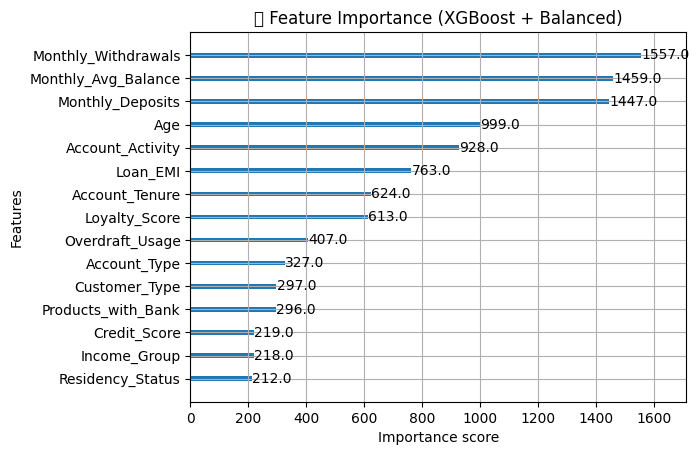

100%|===================| 19973/20000 [03:42<00:00]        

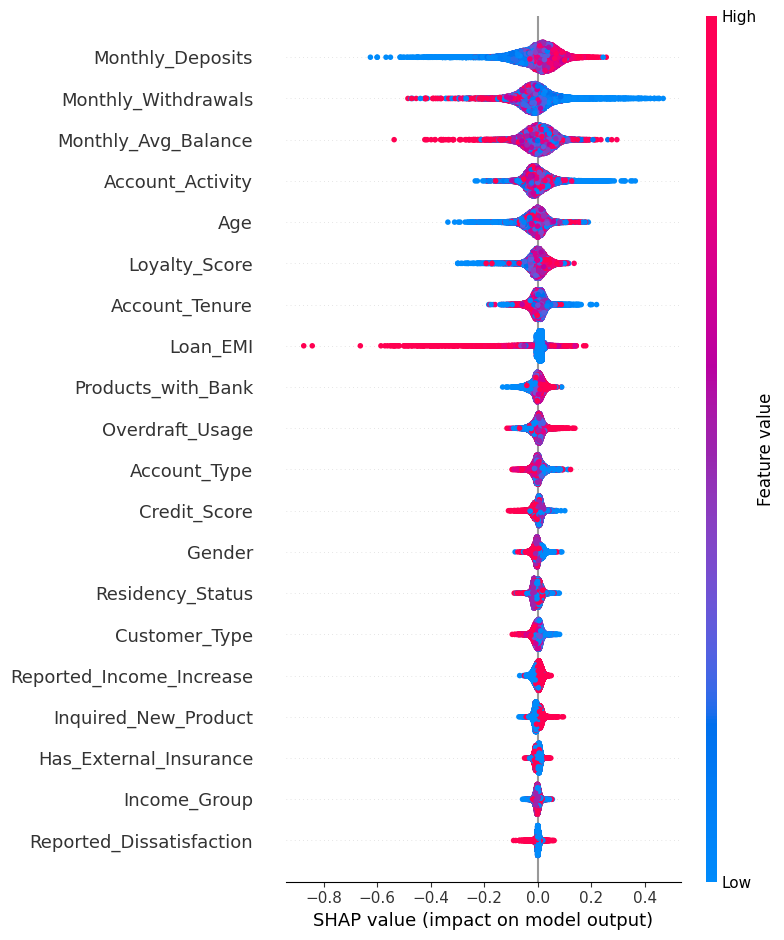

In [3]:
# ✅ Calculate scale_pos_weight to handle class imbalance
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

# ✅ Retrain XGBoost with class imbalance parameter
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric="logloss",
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,  # ✅ Class imbalance fix
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 📌 Step 6 (Re-evaluate)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"📊 Model Performance (XGBoost + Class Imbalance Fix):")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# 📌 Step 7 (Feature Importance)
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=15)
plt.title("🔍 Feature Importance (XGBoost + Balanced)")
plt.show()

# 📌 Step 8 (SHAP Summary)
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [ ]:
#continued in 03_xgboost_with_behavioral_features.ipynb